# Coauthor network analysis on Scopus database articles with "Big Data Analytics" as keyword

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
# read the csv file

df = pd.read_csv("scopus_1.csv")

In [3]:
# get all column names in data

df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Year', 'Cited by',
       'Link', 'Affiliations', 'Authors with affiliations', 'Funding Details',
       'Publisher', 'EID'],
      dtype='object')

In [4]:
# select the columns required 

df=df.loc[:, ['EID', 'Authors', 'Author(s) ID','Year', 'Cited by', 
              'Authors with affiliations', 'Funding Details']]

In [5]:
df.head()

,EID,Authors,Author(s) ID,Year,Cited by,Authors with affiliations,Funding Details
0,2-s2.0-84962589258,Alahakoon D.; Yu X.,6602546111; 7404114597,2016,353,"Alahakoon D., La Trobe University, Melbourne, ...",NaN
1,2-s2.0-85000765414,Addo-Tenkorang R.; Helo P.T.,51863356500; 6506880314,2016,238,"Addo-Tenkorang R., University of Vaasa, Facult...",NaN
2,2-s2.0-85047273605,Grover V.; Chiang R.H.L.; Liang T.-P.; Zhang D.,7006625568; 56254265700; 7202019287; 10042379000,2018,378,"Grover V., Information Systems at the Walton S...","Google, Inc.; National Science Foundation, NSF..."
3,2-s2.0-85023646566,Nguyen T.; ZHOU L.; Spiegler V.; Ieromonachou ...,57194854988; 57204687859; 55444103700; 1572898...,2018,269,"Nguyen T., Connected Cities Research Group, Sy...",NaN
4,2-s2.0-84978091653,Chen M.; Ma Y.; Song J.; Lai C.-F.; Hu B.,25821032200; 56040310400; 57189515572; 3680189...,2016,295,"Chen M., School of Computer Science and Techno...",NaN


In [6]:
# number of rows and columns

df.shape

(19503, 7)

# Data Pre-processing

In [7]:
# info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19503 entries, 0 to 19502
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EID                        19503 non-null  object
 1   Authors                    19502 non-null  object
 2   Author(s) ID               19502 non-null  object
 3   Year                       19503 non-null  int64 
 4   Cited by                   19503 non-null  int64 
 5   Authors with affiliations  19490 non-null  object
 6   Funding Details            9310 non-null   object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


In [8]:
# convert data types from 'object' to 'string'

cols = ['EID', 'Authors', 'Author(s) ID', 'Authors with affiliations', 'Funding Details']
df[cols] = df[cols].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19503 entries, 0 to 19502
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EID                        19503 non-null  string
 1   Authors                    19502 non-null  string
 2   Author(s) ID               19502 non-null  string
 3   Year                       19503 non-null  int64 
 4   Cited by                   19503 non-null  int64 
 5   Authors with affiliations  19490 non-null  string
 6   Funding Details            9310 non-null   string
dtypes: int64(2), string(5)
memory usage: 1.0 MB


In [9]:
# remove rows with no affliations for authors and reset index

df = df.dropna(subset=['Authors with affiliations'])
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19490 entries, 0 to 19489
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EID                        19490 non-null  string
 1   Authors                    19490 non-null  string
 2   Author(s) ID               19490 non-null  string
 3   Year                       19490 non-null  int64 
 4   Cited by                   19490 non-null  int64 
 5   Authors with affiliations  19490 non-null  string
 6   Funding Details            9308 non-null   string
dtypes: int64(2), string(5)
memory usage: 1.0 MB


In [10]:
# 1st row authors
df.loc[0, 'Authors']

'Alahakoon D.; Yu X.'

In [11]:
# 1st row authors ids
df.loc[0, 'Author(s) ID']

'6602546111; 7404114597'

In [12]:
# 1st row authors with affiliations
df.loc[0, 'Authors with affiliations']

'Alahakoon D., La Trobe University, Melbourne, 3086, VIC, Australia; Yu X., Platform Technologies Research Institute, Royal Melbourne Institute of Technology University, Melbourne, 3000, VIC, Australia'

In [13]:
# Separating Author names from df['Authors'] by splitting at ';' and 
# Creating Country from df['Authors with affiliations'] by splitting at ';' and ','

EID = []
Author = []
Author_ID = []
Citations = []
Year = []
Country = []

errors = []

for i in range(df.shape[0]):
    
    auths = df.loc[i, 'Authors'].split(';')
    
    auths_id = df.loc[i, 'Author(s) ID'].split(';')
    
    affls = df.loc[i, 'Authors with affiliations'].split(';')
    
    if (len(auths) != len(affls)) or (len(auths) != len(auths_id)) or (len(affls) != len(auths_id)):
        errors.append(i)
    
    else:
        for j in range(len(auths)):
            
            EID.append(df['EID'][i])

            Author.append(auths[j].strip())
            
            Author_ID.append(auths_id[j].strip())
            
            Citations.append(df['Cited by'][i])
            
            Year.append(df['Year'][i])
            
            affl = affls[j].split(',')
            coun = affl[-1]
            Country.append(coun.strip())

In [14]:
# display the errors

print(f"{len(errors)} rows have mismatch with number of authors and affiliations")

display(df.iloc[errors, :])

26 rows have mismatch with number of authors and affiliations


,EID,Authors,Author(s) ID,Year,Cited by,Authors with affiliations,Funding Details
1090,2-s2.0-84944674016,Mezghani E.; Exposito E.; Drira K.; Da Silveir...,55370968200; 55882867200; 6601972872; 56435597...,2015,67,"Mezghani E., CNRS; LAAS, 7 av. du Colonel Roch...",National Research Foundation of Korea
1141,2-s2.0-85042919914,Srinivas S.; Ravindran A.R.,56585453400; 16228163900,2018,71,"Srinivas S., Department of Industrial and Manu...",<NA>
1191,2-s2.0-85033789276,Wu P.-J.; Lin K.-C.,56814106200; 57196946330,2018,64,"Wu P.-J., Department of Transportation and Log...","MOST 106-2410-H-035-013-MY2, (106-2410-H-035-0..."
1369,2-s2.0-85101573102,Mithun Ali S.; Kumar Paul S.; Chowdhury P.; Ag...,57193722242; 9246007500; 57208258525; 55429950...,2021,56,"Mithun Ali S., Department of Industrial and Pr...",Department of Industrial and Production Engine...
2027,2-s2.0-85078089775,Ricciardi C.; Cantoni V.; Improta G.; Iupparie...,57208693104; 55924335100; 55561419900; 3653695...,2020,39,"Ricciardi C., Department of Advanced Biomedica...",<NA>
2086,2-s2.0-85050150949,Srinivas S.; Rajendran S.,56585453400; 56585457200,2019,37,"Srinivas S., Department of Industrial and Manu...",<NA>
2200,2-s2.0-85144442583,Hong L.; Luo M.; Wang R.; Lu P.; Lu W.; Lu L.,58024822600; 58024627600; 57194284795; 5802482...,2018,34,"Hong L., School of Information Management, Wuh...","National Natural Science Foundation of China, ..."
3472,2-s2.0-85036648237,Tsai C.-W.; Liu S.-J.; Wang Y.-C.,34870991000; 57257483700; 57198522480,2018,23,"Tsai C.-W., Department of Computer Science and...","Ministry of Science andTechnology of Taiwan, (..."
3663,2-s2.0-85110889206,Qiao F.; Wu J.; Li J.; Bashir A.K.; Mumtaz S.;...,57215812987; 56190095000; 56103299700; 5719395...,2021,20,"Qiao F., Shanghai Key Laboratory of Integrated...","National Natural Science Foundation of China, ..."
4669,2-s2.0-85092248658,Fang P.; Yang J.; Zheng L.; Zhong R.Y.; Jiang Y.,57205731524; 57192452164; 56297440600; 5535369...,2020,15,"Fang P., School of Mechanical Engineering & Au...",<NA>


In [15]:
# removing these rows from df dataframe

df.drop(errors, inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(19464, 7)

In [17]:
print(f'Total number of publications in all years = {df.shape[0]}')

Total number of publications in all years = 19464


In [18]:
df

,EID,Authors,Author(s) ID,Year,Cited by,Authors with affiliations,Funding Details
0,2-s2.0-84962589258,Alahakoon D.; Yu X.,6602546111; 7404114597,2016,353,"Alahakoon D., La Trobe University, Melbourne, ...",<NA>
1,2-s2.0-85000765414,Addo-Tenkorang R.; Helo P.T.,51863356500; 6506880314,2016,238,"Addo-Tenkorang R., University of Vaasa, Facult...",<NA>
2,2-s2.0-85047273605,Grover V.; Chiang R.H.L.; Liang T.-P.; Zhang D.,7006625568; 56254265700; 7202019287; 10042379000,2018,378,"Grover V., Information Systems at the Walton S...","Google, Inc.; National Science Foundation, NSF..."
3,2-s2.0-85023646566,Nguyen T.; ZHOU L.; Spiegler V.; Ieromonachou ...,57194854988; 57204687859; 55444103700; 1572898...,2018,269,"Nguyen T., Connected Cities Research Group, Sy...",<NA>
4,2-s2.0-84978091653,Chen M.; Ma Y.; Song J.; Lai C.-F.; Hu B.,25821032200; 56040310400; 57189515572; 3680189...,2016,295,"Chen M., School of Computer Science and Techno...",<NA>
...,...,...,...,...,...,...,...
19459,2-s2.0-85009981768,Liu Y.,57193012611,2016,0,"Liu Y., Institue of Applied Electronics, Chong...",<NA>
19460,2-s2.0-85076878558,Kataoka Y.; Nakatsuji M.; Toda H.; Koike Y.; M...,56022336100; 14625188900; 40762363600; 5718929...,2016,0,"Kataoka Y., NTT Service Evolution Laboratories...",<NA>
19461,2-s2.0-85008930024,Zhou Y.; Shi W.; Song F.; You I.,57192907238; 57192909782; 57202502244; 1403840...,2016,0,"Zhou Y., Institute of Education and Economy Re...",<NA>
19462,2-s2.0-84961620793,Xiong Y.-H.; Li L.; Jiang K.-Y.; Yu H.,25960533200; 57022701600; 7103330877; 57188548616,2016,0,"Xiong Y.-H., School of Automation, China Unive...",<NA>


In [19]:
# Creating a new dataframe 'df1' using 6 new lists created previously 

df1 = pd.DataFrame(list(zip(EID, Author, Author_ID, Country, Citations, Year)), 
                   columns=['EID', 'Author', 'Author_ID', 'Country', 'Citations', 'Year'])

cols = ['EID', 'Author', 'Author_ID', 'Country']
df1[cols] = df1[cols].astype('string')

In [20]:
df1

,EID,Author,Author_ID,Country,Citations,Year
0,2-s2.0-84962589258,Alahakoon D.,6602546111,Australia,353,2016
1,2-s2.0-84962589258,Yu X.,7404114597,Australia,353,2016
2,2-s2.0-85000765414,Addo-Tenkorang R.,51863356500,Finland,238,2016
3,2-s2.0-85000765414,Helo P.T.,6506880314,Finland,238,2016
4,2-s2.0-85047273605,Grover V.,7006625568,United States,378,2018
...,...,...,...,...,...,...
75484,2-s2.0-84961620793,Li L.,57022701600,China,0,2016
75485,2-s2.0-84961620793,Jiang K.-Y.,7103330877,United States,0,2016
75486,2-s2.0-84961620793,Yu H.,57188548616,China,0,2016
75487,2-s2.0-84980042010,Hajirahimova M.S.,41261266500,Azerbaijan,0,2015


In [21]:
# find the number of unique authors from df1 dataframe

unique_ids = list(df1['Author_ID'].unique())

print("Number of unique authors:", len(unique_ids))

Number of unique authors: 56221


In [22]:
# same author may have affiliations from different countries
# for example, consider the following author id

df1[df1['Author_ID']=='6602546111']

,EID,Author,Author_ID,Country,Citations,Year
0,2-s2.0-84962589258,Alahakoon D.,6602546111,Australia,353,2016
2619,2-s2.0-85078262919,Alahakoon D.,6602546111,Australia,113,2020
10173,2-s2.0-85056620570,Alahakoon D.,6602546111,Australia,36,2019
10354,2-s2.0-85045716519,Alahakoon D.,6602546111,Australia,33,2018
12577,2-s2.0-85122644230,Alahakoon D.,6602546111,Australia,27,2021
24876,2-s2.0-85101077722,Alahakoon D.,6602546111,Australia,11,2021
26088,2-s2.0-85089858844,Alahakoon D.,6602546111,Australia,10,2023
32440,2-s2.0-85084915954,Alahakoon D.,6602546111,Australia,7,2020
34878,2-s2.0-85084231187,Alahakoon D.,6602546111,Australia,6,2020
39337,2-s2.0-85132329335,Alahakoon D.,6602546111,Sri Lanka,4,2022


In [23]:
# group by Author ID and aggregate by sum of citations for all his articles
# and by number of his publications from df1 dataframe 

df2 = df1.groupby(['Author_ID']).agg(Author=('Author', 'first'),
                                     Citations=('Citations', 'sum'),
                                     Publications=('Author', 'count'),
                                     Country=('Country', lambda x: x.value_counts().index[0]))

df2.reset_index(inplace=True)

df2

,Author_ID,Author,Citations,Publications,Country
0,10039532600,Kcira D.,57,1,United States
1,10039572500,Sun S.,51,1,China
2,10039939400,Sakas D.P.,45,7,Greece
3,10039993800,Tawfik H.,11,1,United Kingdom
4,10040010200,Li Z.,1,1,China
...,...,...,...,...,...
56216,9941461600,Wang C.-X.,94,1,Purple Mountain Laboratories
56217,9942502400,Ballal M.S.,1,2,India
56218,9943065400,Zhou S.,0,1,China
56219,9943196500,Latiff L.A.,18,1,Malaysia


In [24]:
# change the countries in df1 using df2

ids = df2['Author_ID'].to_list()
auths = df2['Author'].to_list()
couns = df2['Country'].to_list()

dict_id_coun = {}
dict_id_auth = {}

for i in range(len(ids)):
    
    dict_id_coun[ids[i]] = couns[i]
    dict_id_auth[ids[i]] = auths[i]

    
i = 0

for _id in df1['Author_ID']:
    
    df1.loc[i, 'Country'] = dict_id_coun[_id]
    i += 1

In [25]:
# check the considered author's main country in both df1 and df2

display(df1[df1['Author_ID']=='6602546111'])
display(df2[df2['Author_ID']=='6602546111'])

,EID,Author,Author_ID,Country,Citations,Year
0,2-s2.0-84962589258,Alahakoon D.,6602546111,Australia,353,2016
2619,2-s2.0-85078262919,Alahakoon D.,6602546111,Australia,113,2020
10173,2-s2.0-85056620570,Alahakoon D.,6602546111,Australia,36,2019
10354,2-s2.0-85045716519,Alahakoon D.,6602546111,Australia,33,2018
12577,2-s2.0-85122644230,Alahakoon D.,6602546111,Australia,27,2021
24876,2-s2.0-85101077722,Alahakoon D.,6602546111,Australia,11,2021
26088,2-s2.0-85089858844,Alahakoon D.,6602546111,Australia,10,2023
32440,2-s2.0-85084915954,Alahakoon D.,6602546111,Australia,7,2020
34878,2-s2.0-85084231187,Alahakoon D.,6602546111,Australia,6,2020
39337,2-s2.0-85132329335,Alahakoon D.,6602546111,Australia,4,2022


,Author_ID,Author,Citations,Publications,Country
51316,6602546111,Alahakoon D.,600,10,Australia


# a) Highest cited author and his h-index (from the world):

The h-index is the largest number h such that h articles have at least h citations each.

In [26]:
# sort authors by the total number of Citations in df2 dataframe

a_ans1 = df2.sort_values(by='Citations', ascending=False)

a_ans1.reset_index(drop=True, inplace=True)

a_ans1.head()

,Author_ID,Author,Citations,Publications,Country
0,56254265700,Chiang R.H.L.,3946,2,United States
1,7006211475,Khoshgoftaar T.M.,3865,21,United States
2,7003462863,Storey V.C.,3574,2,United States
3,8871373800,Chen H.,3568,1,United States
4,25821032200,Chen M.,3558,22,China


In [27]:
highest_cited_auth = a_ans1.iloc[0, 1]
highest_citations = a_ans1.iloc[0, 2]

In [28]:
print(f"Highest cited author: {highest_cited_auth} with {highest_citations} total citations")

Highest cited author: Chiang R.H.L. with 3946 total citations


In [29]:
# get the number of citations for all articles by the highest cited author from df1 dataframe 

a_ans2 = df1[df1['Author_ID']=='56254265700'][['Author', 'Citations']]

a_ans2.sort_values(by=['Citations'], ascending=False, inplace=True)

a_ans2.reset_index(drop=True, inplace=True)

a_ans2.index += 1

a_ans2

,Author,Citations
1,Chiang R.H.L.,3568
2,Chiang R.H.L.,378


In [30]:
h_index = len(a_ans2[a_ans2['Citations'] >= a_ans2.index])

In [31]:
print(f"Highest cited author is {highest_cited_auth} has h-index = {h_index}")

Highest cited author is Chiang R.H.L. has h-index = 2


# b) Highest publication author

In [32]:
# sort authors by the number of publications in df2 dataframe

b_ans = df2.sort_values(by='Publications', ascending=False)

b_ans.reset_index(drop=True, inplace=True)

b_ans.head()

,Author_ID,Author,Citations,Publications,Country
0,57206866080,Kumar N.,2791,59,India
1,57199094588,Song H.,2282,46,United States
2,24066717900,Shamim Hossain M.,1514,40,Saudi Arabia
3,7403649953,Guo S.,1983,38,Hong Kong
4,57189873309,Manogaran G.,2315,35,United States


In [33]:
highest_pub_auth = b_ans.iloc[0, 1]
highest_pubs = b_ans.iloc[0, 3]

In [34]:
print(f"Highest publication author is {highest_pub_auth} with {highest_pubs} publications")

Highest publication author is Kumar N. with 59 publications


# c) Highest cited author's avg. citations, and the country name


In [35]:
# get the highest cited author's articles having citations from a_ans2 dataframe

a_ans2

,Author,Citations
1,Chiang R.H.L.,3568
2,Chiang R.H.L.,378


In [36]:
# highest cited author's average citations is the total number of citations of his articles
# divided by his number of publications

c_ans1 = sum(a_ans2['Citations']) / len(a_ans2['Citations'])

print(f'Average Citations of Highest Cited Author {highest_cited_auth} = {round(c_ans1)}')

Average Citations of Highest Cited Author Chiang R.H.L. = 1973


In [37]:
a_ans1.head()

,Author_ID,Author,Citations,Publications,Country
0,56254265700,Chiang R.H.L.,3946,2,United States
1,7006211475,Khoshgoftaar T.M.,3865,21,United States
2,7003462863,Storey V.C.,3574,2,United States
3,8871373800,Chen H.,3568,1,United States
4,25821032200,Chen M.,3558,22,China


In [38]:
# get the country of the highest cited author from a_ans1 dataframe

c_ans2 = a_ans1.iloc[0, 4]

print(f'Country of Higest Cited Author {highest_cited_auth} = {c_ans2}')

Country of Higest Cited Author Chiang R.H.L. = United States


# d) Total number of publications of the highest cited author


In [39]:
# get the total number of publications of the highest cited author from a_ans1 dataframe

a_ans1.head()

,Author_ID,Author,Citations,Publications,Country
0,56254265700,Chiang R.H.L.,3946,2,United States
1,7006211475,Khoshgoftaar T.M.,3865,21,United States
2,7003462863,Storey V.C.,3574,2,United States
3,8871373800,Chen H.,3568,1,United States
4,25821032200,Chen M.,3558,22,China


In [40]:
d_ans = a_ans1.iloc[0, 3]

print(f'Total number of publications of the highest cited author {highest_cited_auth} = {d_ans}')

Total number of publications of the highest cited author Chiang R.H.L. = 2


# e) Total publication in year

In [41]:
# group by Year and aggregate the number of publications from df dataframe

e_ans = df.groupby('Year').agg(Total_Publications=('Authors', 'count'))

e_ans

,Total_Publications
Year,
2011,1
2012,9
2013,43
2014,137
2015,286
2016,546
2017,896
2018,1531
2019,2327


In [42]:
# check for total publications in all years = 19464

sum(e_ans['Total_Publications'])

19464

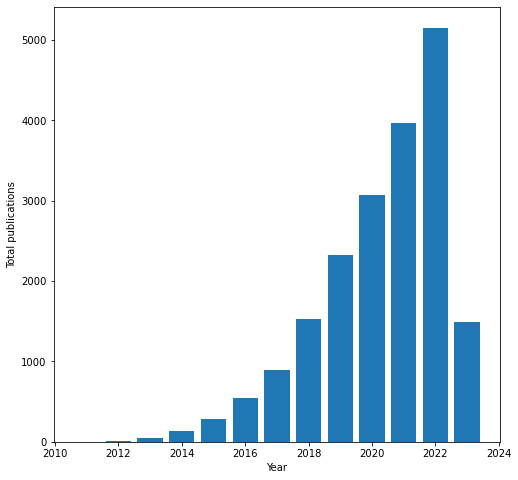

In [43]:
# plot the yearwise total number of publications

plt.figure(figsize=(8,8))

plt.bar(e_ans.index, e_ans['Total_Publications'])

plt.xlabel('Year')
plt.ylabel('Total publications')

plt.show()

# f) Total citation per year

In [44]:
# group by Year and aggregate by summing the number of citations from df dataframe

f_ans = df.groupby('Year').agg(Total_Citations=('Cited by', 'sum'))

f_ans

,Total_Citations
Year,
2011,107
2012,3701
2013,2386
2014,11952
2015,17911
2016,28341
2017,44948
2018,51080
2019,60969


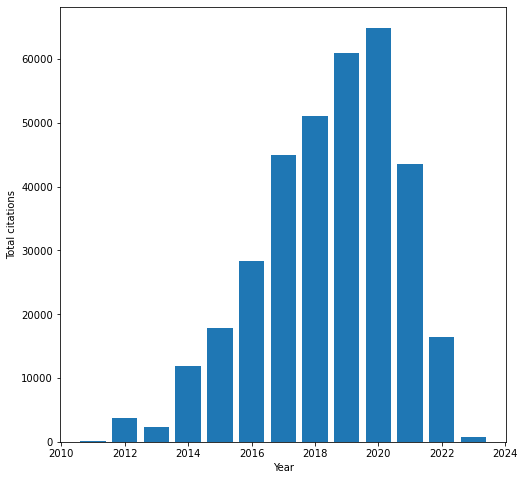

In [45]:
# plot the yearwise total number of citations

plt.figure(figsize=(8,8))

plt.bar(f_ans.index, f_ans['Total_Citations'])

plt.xlabel('Year')
plt.ylabel('Total citations')

plt.show()

# g) Author(country) having highest co-authorship with Indian authors

In [46]:
# get rows with Indian author from df1 dataframe

g1_ans = df1[df1['Country']=='India']
g1_ans

,EID,Author,Author_ID,Country,Citations,Year
33,2-s2.0-85056989353,Manavalan E.,57204761658,India,424,2019
34,2-s2.0-85056989353,Jayakrishna K.,42761689800,India,424,2019
51,2-s2.0-85063404249,Rajput S.,57203212455,India,244,2019
52,2-s2.0-85063404249,Singh S.P.,57199578228,India,244,2019
62,2-s2.0-85063612422,Misra S.K.,57898178300,India,361,2019
...,...,...,...,...,...,...
75448,2-s2.0-85007421311,Jothi B.,57191851797,India,0,2016
75449,2-s2.0-85007421311,Pushpalatha M.,35146619400,India,0,2016
75450,2-s2.0-85007421311,Krishnaveni S.,57211183200,India,0,2016
75454,2-s2.0-85031790719,Mukkamula V.G.,56525246800,India,0,2017


In [47]:
# get EIDs of unique articles having atleast one Indian coauthor from above dataframe

eids = np.unique(g1_ans['EID']).tolist()

In [48]:
# get all the articles with above eids from df1 dataframe

g2_ans = df1[df1['EID'].isin(eids)]

# get rows other than Indian authors from g2_ans dataframe

g2_ans = g2_ans[g2_ans['Country'] != 'India']

g2_ans

,EID,Author,Author_ID,Country,Citations,Year
60,2-s2.0-85063612422,Hughes L.,57205405210,United Kingdom,361,2019
61,2-s2.0-85063612422,Dwivedi Y.K.,35239818900,United Kingdom,361,2019
63,2-s2.0-85063612422,Rana N.P.,50262828700,United Kingdom,361,2019
100,2-s2.0-85087759636,Dwivedi Y.K.,35239818900,United Kingdom,394,2021
101,2-s2.0-85087759636,Ismagilova E.,57190979823,United Kingdom,394,2021
...,...,...,...,...,...,...
74568,2-s2.0-85071304428,Tiwari B.,36934359400,Ethiopia,0,2019
74633,2-s2.0-85057270850,Hegazi M.O.,57190255769,Saudi Arabia,0,2018
74635,2-s2.0-85057270850,Zia K.,24438557000,Austria,0,2018
74805,2-s2.0-85069924847,Aboagye E.O.,57202188008,China,0,2019


In [49]:
# group by Author ID and aggregate the number of co-authorships from above dataframe

g3_ans = g2_ans.groupby('Author_ID').agg(Author=('Author', 'first'),
                                         NumCoAuthorships=('Author_ID', 'count'),
                                         Country=('Country', 'first'))

g3_ans.sort_values('NumCoAuthorships', ascending=False, inplace=True)

g3_ans.reset_index(inplace=True)

g3_ans.head()

,Author_ID,Author,NumCoAuthorships,Country
0,57189873309,Manogaran G.,27,United States
1,35239818900,Dwivedi Y.K.,20,United Kingdom
2,50262828700,Rana N.P.,18,United Kingdom
3,25930566300,Rodrigues J.J.P.C.,17,Portugal
4,36661792200,Alazab M.,13,Australia


In [50]:
print(f'{g3_ans.iloc[0,1]} from {g3_ans.iloc[0,3]} has highest coauthorship with Indian authors')

Manogaran G. from United States has highest coauthorship with Indian authors


# h) Highest cited author from India

In [51]:
# get the rows with Indian authors from df2 dataframe

h_ans = df2[df2['Country']=='India'].copy()

h_ans.sort_values('Citations', ascending=False, inplace=True)

h_ans.reset_index(drop=True, inplace=True)

h_ans.head()

,Author_ID,Author,Citations,Publications,Country
0,57206866080,Kumar N.,2791,59,India
1,57194561385,Kumar P.M.,1881,31,India
2,56576145100,Tanwar S.,1699,30,India
3,55911169300,Kar A.K.,1616,22,India
4,56372587000,Varatharajan R.,1448,15,India


In [52]:
print(f'Higest Cited Author from India is {h_ans.iloc[0, 1]} with {h_ans.iloc[0, 2]} citations')

Higest Cited Author from India is Kumar N. with 2791 citations


# i) Comparative year wise article publication analysis of India, China and United States 

In [53]:
# get rows with India, China, US authors from df1 dataframe

i1_ans = df1[(df1['Country']=='India') | (df1['Country']=='China') | (df1['Country']=='United States')] 

i1_ans

,EID,Author,Author_ID,Country,Citations,Year
4,2-s2.0-85047273605,Grover V.,7006625568,United States,378,2018
5,2-s2.0-85047273605,Chiang R.H.L.,56254265700,United States,378,2018
7,2-s2.0-85047273605,Zhang D.,10042379000,United States,378,2018
13,2-s2.0-84978091653,Chen M.,25821032200,China,295,2016
14,2-s2.0-84978091653,Ma Y.,56040310400,China,295,2016
...,...,...,...,...,...,...
75481,2-s2.0-85008930024,Song F.,57202502244,China,0,2016
75483,2-s2.0-84961620793,Xiong Y.-H.,25960533200,United States,0,2016
75484,2-s2.0-84961620793,Li L.,57022701600,China,0,2016
75485,2-s2.0-84961620793,Jiang K.-Y.,7103330877,United States,0,2016


In [54]:
# group by year, group by country and then aggregate the number of unique publications from above dataframe 

i2_ans = i1_ans.groupby(['Year', 'Country']).agg(Publications=('EID', lambda x: len(np.unique(x))))

i2_ans.reset_index(inplace=True)

i2_ans

,Year,Country,Publications
0,2011,China,1
1,2012,United States,7
2,2013,China,10
3,2013,India,2
4,2013,United States,23
5,2014,China,28
6,2014,India,7
7,2014,United States,47
8,2015,China,59
9,2015,India,17


<AxesSubplot:xlabel='Year', ylabel='Publications'>

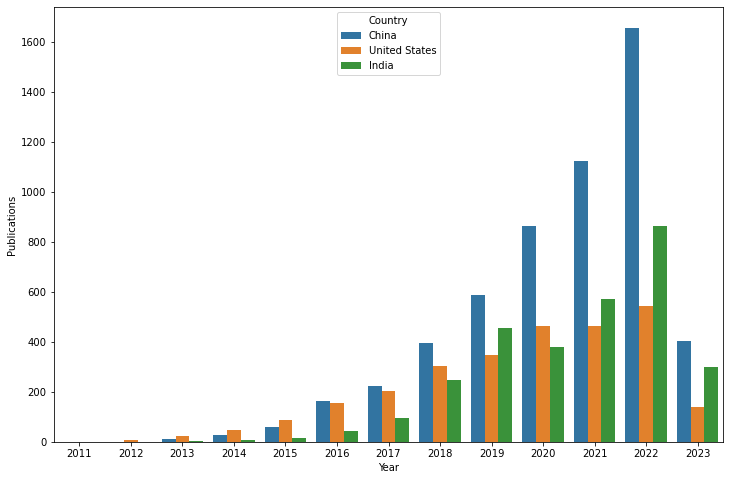

In [55]:
# plot the yearwise total number of publications from the 3 countries

import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x="Year",
           y="Publications",
           hue="Country",
           data=i2_ans)

# j) Total number of grants given to the field

In [56]:
# find the number of non null funding details from df dataframe

j_ans = df['Funding Details']

not_null = j_ans.notnull().sum()

not_null

9301

In [57]:
print(f"Total number of grants given to the field 'Big Data Analytics' are {not_null}")

Total number of grants given to the field 'Big Data Analytics' are 9301


# k) Country wise total number of publication

In [58]:
# group by Country and aggregate the number of unique EIDs from df1 dataframe

k_ans = df1.groupby(['Country']).agg(Publications=('EID', lambda x: len(np.unique(x))))

k_ans.sort_values('Publications', inplace =True, ascending=False)

k_ans = k_ans.iloc[0:95,:]

k_ans

,Publications
Country,
China,5516
India,2981
United States,2782
United Kingdom,1242
Saudi Arabia,969
...,...
Kyrgyzstan,6
Cuba,6
Namibia,6


<AxesSubplot:xlabel='Country'>

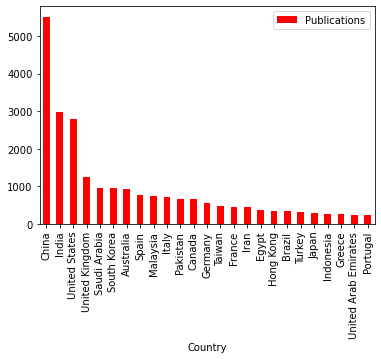

In [59]:
# plot the top 25 countries in total number of publications

k_ans[0:25].plot(kind= 'bar', color = 'r')